r2_score: 0.45


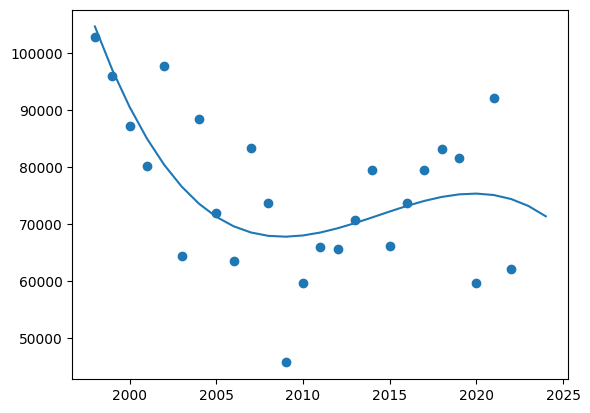

In [412]:
##############################################################
#  imports
##############################################################
from charts.graficas_plotly import miles_peso_, grupos_exp_real,peces
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
##############################################################
# predecir el precio en millones de pesos del pescado en exportaciones (total)
##############################################################

años =np.array([x for x in range(1998,2023)]).reshape(-1,1)
sumap1 = miles_peso_.T.loc['Pescado y marisco fresco y congelado']
sumap2 = miles_peso_.T.loc['Pescado y marisco en conserva']
valores = np.array(sumap1+sumap2)

degree=3
poly_feature =PolynomialFeatures(degree=degree,include_bias=False)

x_poly = poly_feature.fit_transform(años)

model = LinearRegression()
model.fit(x_poly,valores)


y= model.predict(x_poly)
r2 = r2_score(valores,y)
print(f"r2_score: {r2:.2f}")

pre = np.array([[2023],[2024]])
x_future = poly_feature.transform(pre)
predict = model.predict(x_future)

aaa=list(y)+list(predict)
plt.scatter(años,valores)
plt.plot([x for x in range(1998,2025)],aaa)
plt.show()


r2_score: 0.60
[76.91623851 80.31934633]


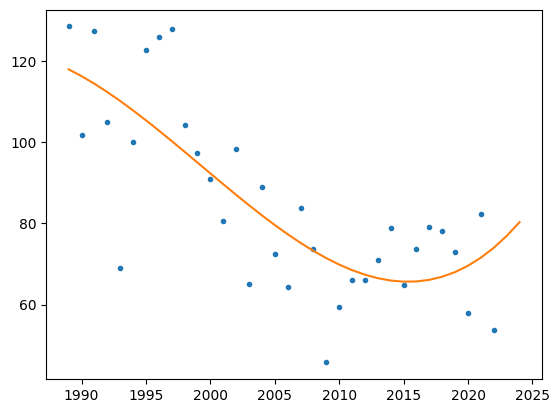

In [382]:
##############################################################
# predicción de grupos de exportaciones
############################################################## 
##############################################################
# predecir exportació de Productos de Pesca
##############################################################

productos_pesca = np.array(grupos_exp_real.loc['Productos de la Pesca'])
annos = np.array([x for x in range(1989,2023)]).reshape(-1,1)

degree=3
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(annos)

modelo = LinearRegression()

modelo.fit(poly_x,productos_pesca)

p = modelo.predict(poly_x)
r2 = r2_score(productos_pesca,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict1 = modelo.predict(x_future1)
print(predict1)

aaa=list(p)+list(predict1)
plt.plot(annos,productos_pesca,'.')
plt.plot([x for x in range(1989,2025)],aaa)
plt.show()

r2_score: 0.60
[48.22377737 54.13654344]


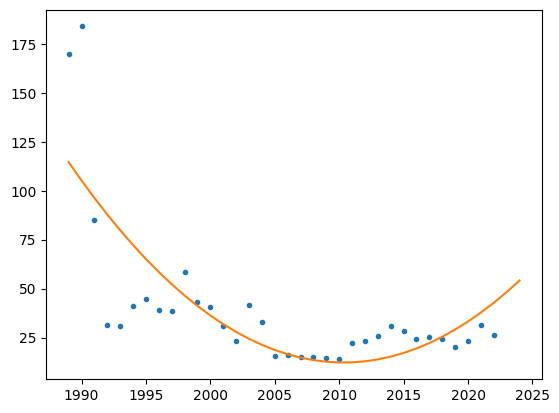

In [383]:
##############################################################
# predecir productos agropecuarios
##############################################################

productos_agropecuarios = np.array(grupos_exp_real.loc['Productos agropecuarios'])
degree=2
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(annos)

modelo2 = LinearRegression()

modelo2.fit(poly_x,productos_agropecuarios)

p = modelo2.predict(poly_x)
r2 = r2_score(productos_agropecuarios,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict2 = modelo2.predict(x_future1)
print(predict2)
aaa=list(p)+list(predict2)
plt.plot(annos,productos_agropecuarios,'.')
plt.plot([x for x in range(1989,2025)],aaa)
plt.show()

r2_score: 0.67
[829.63325067 973.67378988]


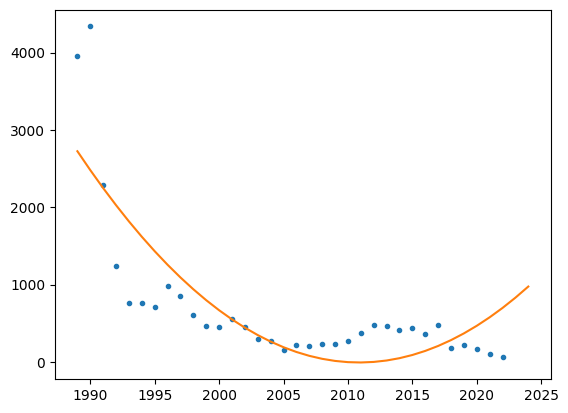

In [384]:
##############################################################
# predecir productos de la industria azucarera
##############################################################

productos_azucar = np.array(grupos_exp_real.loc['Productos de la industria azucarera'])
degree=2
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(annos)

modelo3 = LinearRegression()

modelo3.fit(poly_x,productos_azucar)

p = modelo3.predict(poly_x)
r2 = r2_score(productos_azucar,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict3 = modelo3.predict(x_future1)
print(predict3)
aaa=list(p)+list(predict3)
plt.plot(annos,productos_azucar,'.')
plt.plot([x for x in range(1989,2025)],aaa)
plt.show()

r2_score: 0.38
[590.11186634 533.41362586]


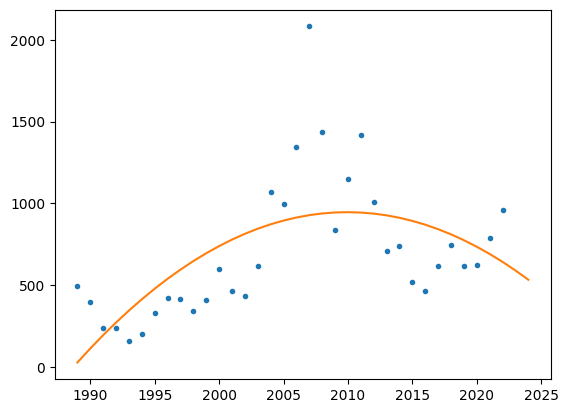

In [385]:
##############################################################
# predecir productos de la mineria
##############################################################
productos_mineria = np.array(grupos_exp_real.loc['Productos de la minería'])
degree=2
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(annos)

modelo4 = LinearRegression()

modelo4.fit(poly_x,productos_mineria)

p = modelo4.predict(poly_x)
r2 = r2_score(productos_mineria,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict4 = modelo4.predict(x_future1)
print(predict4)
aaa=list(p)+list(predict4)
plt.plot(annos,productos_mineria,'.')
plt.plot([x for x in range(1989,2025)],aaa)
plt.show()

r2_score: 0.82
[225.26074589 221.60232118]


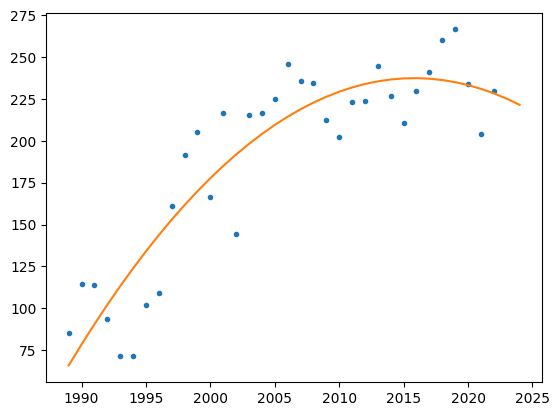

In [386]:
##############################################################
# predecir productos del tabaco
##############################################################

productos_tabaco = np.array(grupos_exp_real.loc['Productos de la industria del tabaco'])
degree=2
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(annos)

modelo5 = LinearRegression()

modelo5.fit(poly_x,productos_tabaco)

p = modelo5.predict(poly_x)
r2 = r2_score(productos_tabaco,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict5 = modelo5.predict(x_future1)
print(predict5)
aaa=list(p)+list(predict5)
plt.plot(annos,productos_tabaco,'.')
plt.plot([x for x in range(1989,2025)],aaa)
plt.show()

In [413]:
r=list(predict1)+list(predict2)+list(predict3)+list(predict4)+list(predict5)
agrego = np.array(r).reshape(-2,2)
agrego

actual = {
    'Productos de Pesca':agrego[0],
    'Productos agropecuarios':agrego[1],
    'Productos de la industria azucarera':agrego[2],
    'Productos de la mineria':agrego[3],
    'Productos del tabaco':agrego[4]

}
actual_df = pd.DataFrame(actual)


r2_score: 0.61
[351.9712987  328.38295313]


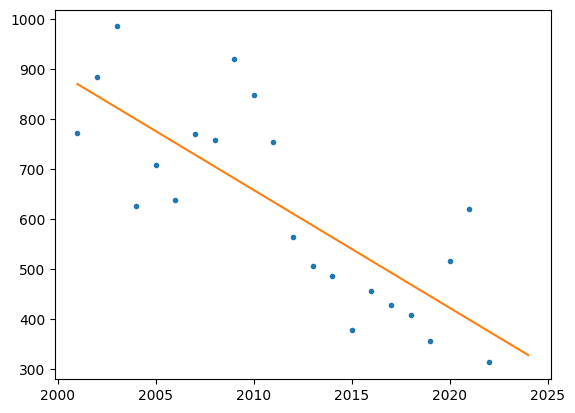

In [422]:
#peces
##############################################################
#predecir pargos
##############################################################
pargo = np.array(peces['Pargo'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree=1
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo6 = LinearRegression()

modelo6.fit(poly_x,pargo)

p = modelo6.predict(poly_x)
r2 = r2_score(pargo,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict6 = modelo6.predict(x_future1)
print(predict6)
aaa=list(p)+list(predict6)
plt.plot(años_peces,pargo,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.59
[41.45513341 50.16013795]


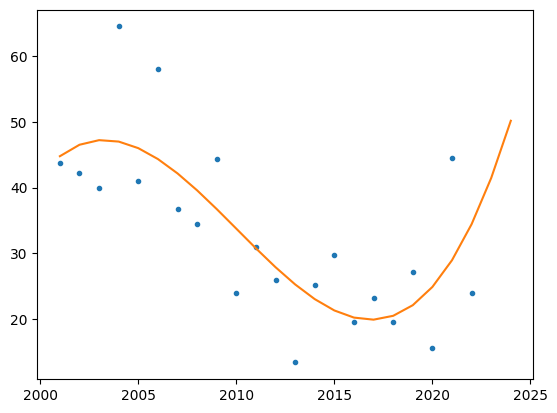

In [429]:
##############################################################
#predecir cherna
##############################################################

cherna = np.array(peces['Cherna'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree=3
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo7 = LinearRegression()

modelo7.fit(poly_x,cherna)

p = modelo7.predict(poly_x)
r2 = r2_score(cherna,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict7 = modelo7.predict(x_future1)
print(predict7)
aaa=list(p)+list(predict7)
plt.plot(años_peces,cherna,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.34
[549.58762436 460.46820979]


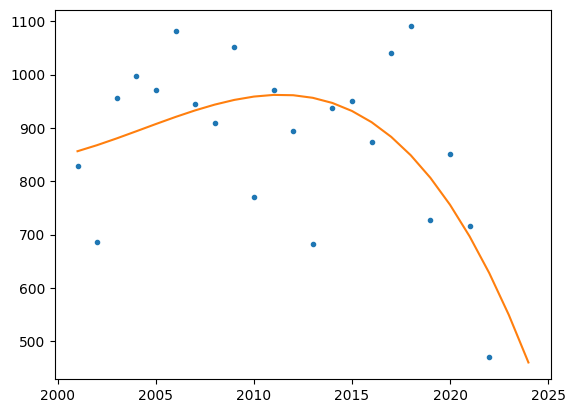

In [440]:
##############################################################
#predecir tunidos
##############################################################

tunidos = np.array(peces['Túnidos'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree=5
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo8 = LinearRegression()

modelo8.fit(poly_x,tunidos)

p = modelo8.predict(poly_x)
r2 = r2_score(tunidos,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict8 = modelo8.predict(x_future1)
print(predict8)
aaa=list(p)+list(predict8)
plt.plot(años_peces,tunidos,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.92
[122.55566072 188.09691644]


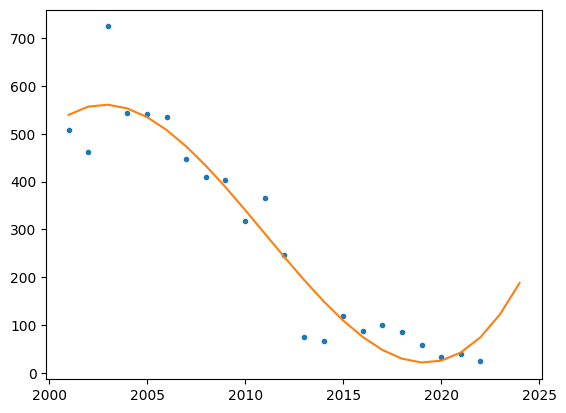

In [442]:
##############################################################
#predecir Bonito
##############################################################

Bonito = np.array(peces['Bonito'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree=3
poly =PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo9 = LinearRegression()

modelo9.fit(poly_x,Bonito)

p = modelo9.predict(poly_x)
r2 = r2_score(Bonito,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict9 = modelo9.predict(x_future1)
print(predict9)
aaa=list(p)+list(predict9)
plt.plot(años_peces,Bonito,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.33
[646.91941559 569.69313665]


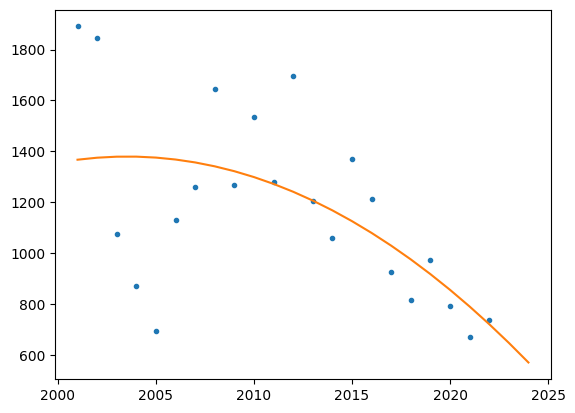

In [448]:
##############################################################
#predecir Biajaiba
##############################################################

Biajaiba = np.array(peces['Biajaiba'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo10 = LinearRegression()

modelo10.fit(poly_x,Biajaiba)

p = modelo10.predict(poly_x)
r2 = r2_score(Biajaiba,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict10 = modelo10.predict(x_future1)

print(predict10)
aaa = list(p)+list(predict10)
plt.plot(años_peces,Biajaiba,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.61
[568.53603542 294.630638  ]


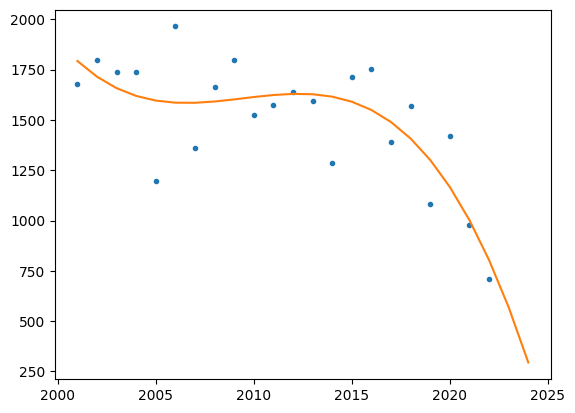

In [457]:
##############################################################
#predecir Machuelo
##############################################################

Machuelo = np.array(peces['Machuelo'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 4
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo11 = LinearRegression()

modelo11.fit(poly_x,Machuelo)

p = modelo11.predict(poly_x)
r2 = r2_score(Machuelo,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict11 = modelo11.predict(x_future1)

print(predict11)
aaa = list(p)+list(predict11)
plt.plot(años_peces,Machuelo,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.89
[97.74077922 83.23570864]


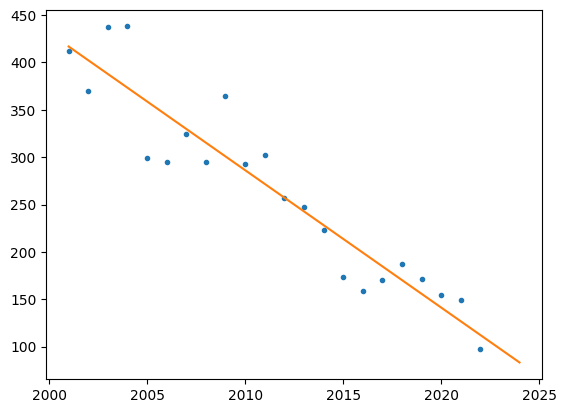

In [461]:
##############################################################
#predecir Rabirubia
##############################################################

Rabirubia = np.array(peces['Rabirubia'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo12 = LinearRegression()

modelo12.fit(poly_x,Rabirubia)

p = modelo12.predict(poly_x)
r2 = r2_score(Rabirubia,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict12 = modelo12.predict(x_future1)

print(predict12)
aaa = list(p)+list(predict12)
plt.plot(años_peces,Rabirubia,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.83
[785.9950819  735.50279284]


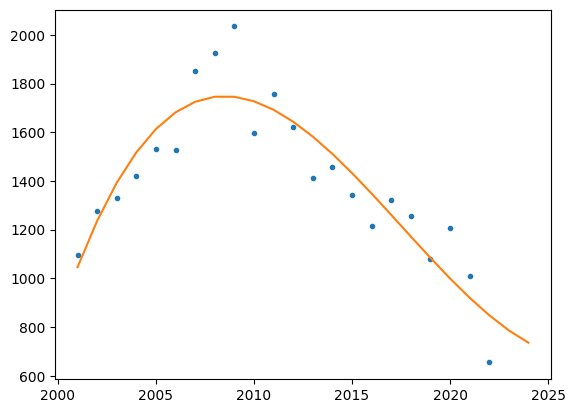

In [467]:
##############################################################
#predecir Raya
##############################################################

Raya = np.array(peces['Raya'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo13 = LinearRegression()

modelo13.fit(poly_x,Raya)

p = modelo13.predict(poly_x)
r2 = r2_score(Raya,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict13 = modelo13.predict(x_future1)

print(predict13)
aaa = list(p)+list(predict13)
plt.plot(años_peces,Raya,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.72
[1460.08956003 1481.45468569]


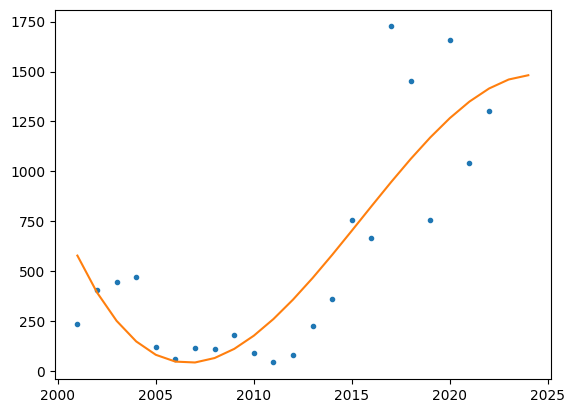

In [472]:
##############################################################
#predecir Carpa
##############################################################

Carpa = np.array(peces['Carpa'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo14 = LinearRegression()

modelo14.fit(poly_x,Carpa)

p = modelo14.predict(poly_x)
r2 = r2_score(Carpa,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict14 = modelo14.predict(x_future1)

print(predict14)
aaa = list(p)+list(predict14)
plt.plot(años_peces,Carpa,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.63
[8398.61083984 6454.57394791]


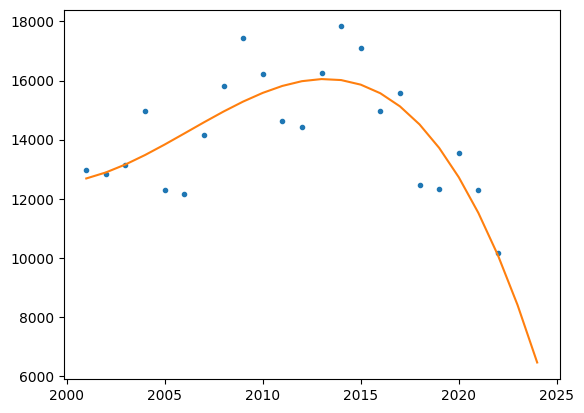

In [479]:
##############################################################
#predecir Tenca
##############################################################

Tenca = np.array(peces['Tenca'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo15 = LinearRegression()

modelo15.fit(poly_x,Tenca)

p = modelo15.predict(poly_x)
r2 = r2_score(Tenca,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict15 = modelo15.predict(x_future1)

print(predict15)
aaa = list(p)+list(predict15)
plt.plot(años_peces,Tenca,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.30
[1552.13246753 1429.54101637]


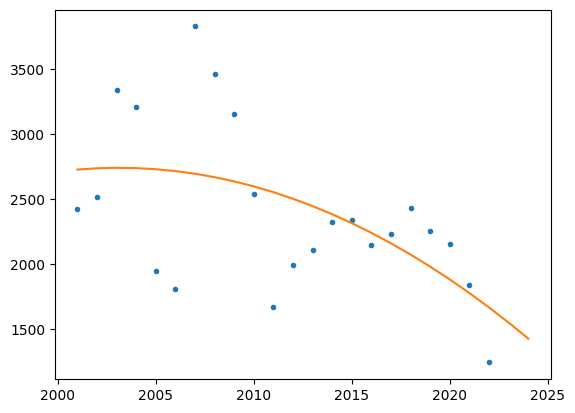

In [490]:
##############################################################
#predecir Tilapia
##############################################################

Tilapia = np.array(peces['Tilapia'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo16 = LinearRegression()

modelo16.fit(poly_x,Tilapia)

p = modelo16.predict(poly_x)
r2 = r2_score(Tilapia,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict16 = modelo16.predict(x_future1)

print(predict16)
aaa = list(p)+list(predict16)
plt.plot(años_peces,Tilapia,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.86
[2021.68707794 1029.23474595]


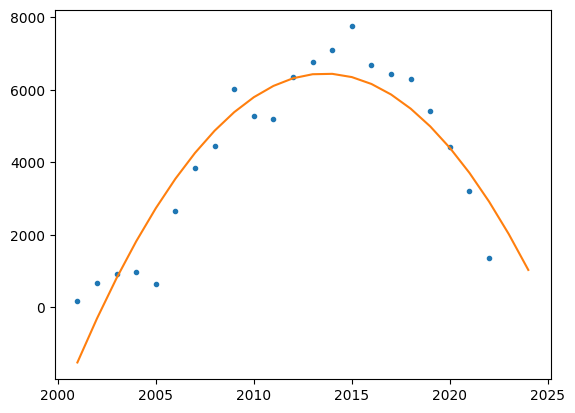

In [494]:
##############################################################
#predecir Claria
##############################################################

Claria = np.array(peces['Claria'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo17 = LinearRegression()

modelo17.fit(poly_x,Claria)

p = modelo17.predict(poly_x)
r2 = r2_score(Claria,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict17 = modelo17.predict(x_future1)

print(predict17)
aaa = list(p)+list(predict17)
plt.plot(años_peces,Claria,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.30
[345.53701299 328.80102202]


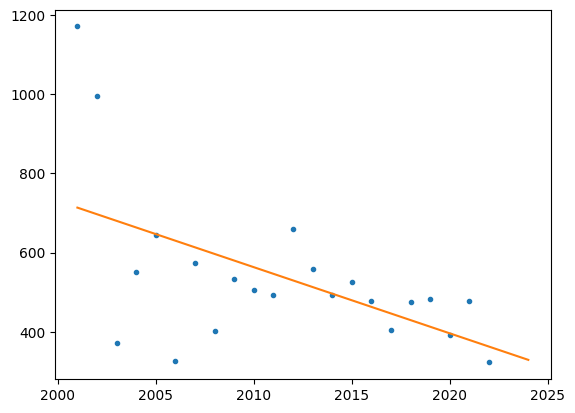

In [502]:
##############################################################
#predecir Cobo
##############################################################

Cobo = np.array(peces['Cobo'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 1
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo18 = LinearRegression()

modelo18.fit(poly_x,Cobo)

p = modelo18.predict(poly_x)
r2 = r2_score(Cobo,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict18 = modelo18.predict(x_future1)

print(predict18)
aaa = list(p)+list(predict18)
plt.plot(años_peces,Cobo,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.41
[376.0731039   95.31283951]


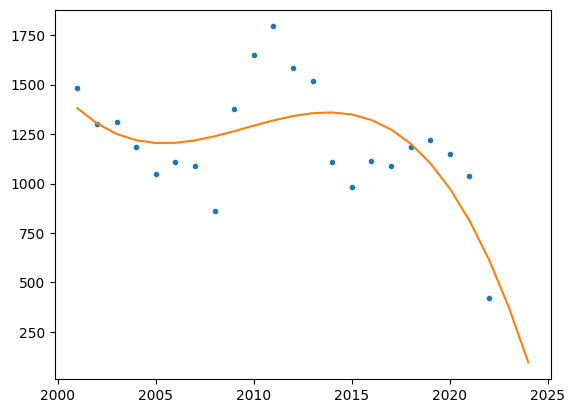

In [508]:
##############################################################
#predecir Ostión
##############################################################

Ostión = np.array(peces['Ostión'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo19 = LinearRegression()

modelo19.fit(poly_x,Ostión)

p = modelo19.predict(poly_x)
r2 = r2_score(Ostión,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict19 = modelo19.predict(x_future1)

print(predict19)
aaa = list(p)+list(predict19)
plt.plot(años_peces,Ostión,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.43
[108.87798701  90.79552513]


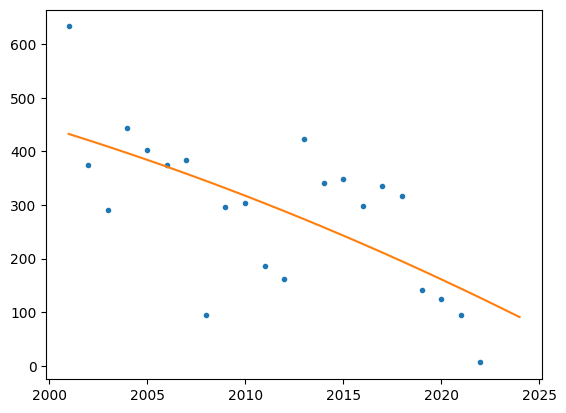

In [514]:
##############################################################
#predecir Almeja
##############################################################

Almeja = np.array(peces['Almeja'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo20 = LinearRegression()

modelo20.fit(poly_x,Almeja)

p = modelo20.predict(poly_x)
r2 = r2_score(Almeja,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict20 = modelo20.predict(x_future1)

print(predict20)
aaa = list(p)+list(predict20)
plt.plot(años_peces,Almeja,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.70
[3675.6179142  3522.47305298]


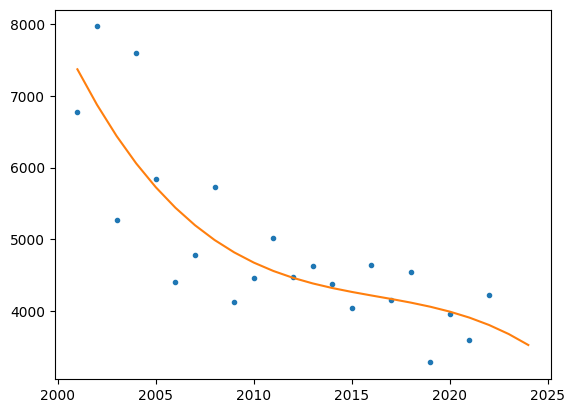

In [518]:
##############################################################
#predecir Langosta
##############################################################

Langosta = np.array(peces['Langosta'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo21 = LinearRegression()

modelo21.fit(poly_x,Langosta)

p = modelo21.predict(poly_x)
r2 = r2_score(Langosta,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict21 = modelo21.predict(x_future1)

print(predict21)
aaa = list(p)+list(predict21)
plt.plot(años_peces,Langosta,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.61
[227.9815017   79.31129849]


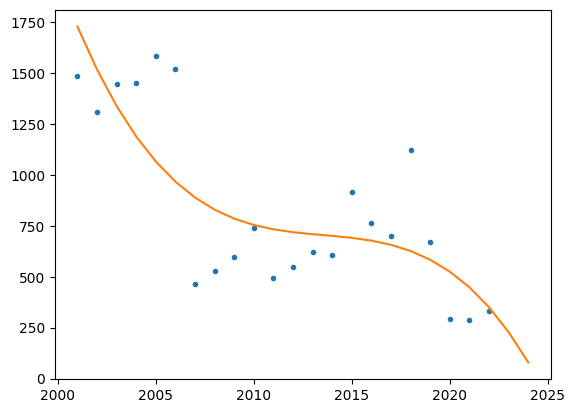

In [522]:
##############################################################
#predecir Camarón de Mar
##############################################################

Camarón = np.array(peces['Camarón de Mar'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 4
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo22 = LinearRegression()

modelo22.fit(poly_x,Camarón)

p = modelo22.predict(poly_x)
r2 = r2_score(Camarón,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict22 = modelo22.predict(x_future1)

print(predict22)
aaa = list(p)+list(predict22)
plt.plot(años_peces,Camarón,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.62
[2883.56419373 1945.28434753]


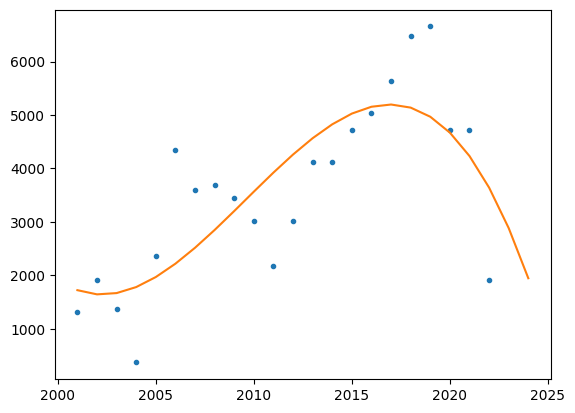

In [527]:
##############################################################
#predecir CCamaronicultura
##############################################################

Camaronicultura = np.array(peces['Camaronicultura'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 3
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo23 = LinearRegression()

modelo23.fit(poly_x,Camaronicultura)

p = modelo23.predict(poly_x)
r2 = r2_score(Camaronicultura,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict23 = modelo23.predict(x_future1)

print(predict23)
aaa = list(p)+list(predict23)
plt.plot(años_peces,Camaronicultura,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

r2_score: 0.68
[1230.93909091 1500.37066628]


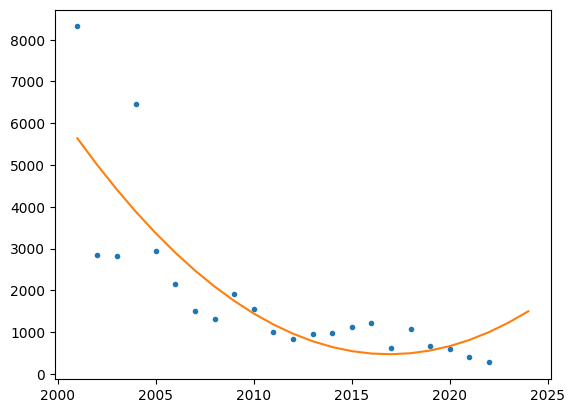

In [531]:
##############################################################
#predecir Moralla
##############################################################

Moralla = np.array(peces['Moralla'])
años_peces = np.array([x for x in range(2001,2023)]).reshape(-1,1)
degree = 2
poly = PolynomialFeatures(degree=degree,include_bias=False)
poly_x = poly.fit_transform(años_peces)

modelo24 = LinearRegression()

modelo24.fit(poly_x,Moralla)

p = modelo24.predict(poly_x)
r2 = r2_score(Moralla,p)
print(f"r2_score: {r2:.2f}")

pre1 = np.array([[2023],[2024]])
x_future1 = poly.transform(pre1)
predict24 = modelo24.predict(x_future1)

print(predict24)
aaa = list(p)+list(predict24)
plt.plot(años_peces,Moralla,'.')
plt.plot([x for x in range(2001,2025)],aaa)
plt.show()

In [532]:
peces

,Pargo,Cherna,Túnidos,Bonito,Biajaiba,Machuelo,Rabirubia,Raya,Carpa,Tenca,Tilapia,Claria,Cobo,Ostión,Almeja,Langosta,Camarón de Mar,Camaronicultura,Moralla
2001,773.40,43.70,828.10,508.30,1891.00,1676.10,412.20,1097.00,235.20,12978.90,2428.40,177.30,1171.70,1481.60,632.80,6775.80,1482.90,1306.00,8316.20
2002,884.50,42.20,685.80,462.40,1844.40,1799.40,369.80,1278.20,406.60,12839.90,2517.40,659.10,997.10,1300.20,374.60,7969.50,1308.00,1910.40,2855.80
2003,986.00,39.90,956.50,724.00,1075.30,1739.90,437.00,1330.70,447.40,13133.10,3341.80,908.50,372.30,1313.40,289.80,5264.40,1446.90,1362.30,2814.40
2004,627.00,64.50,998.20,544.20,871.00,1740.00,438.00,1421.00,470.20,14984.40,3207.40,958.60,552.00,1183.50,442.70,7601.00,1451.10,368.60,6451.00
2005,709.00,41.00,971.60,540.80,694.00,1195.00,299.00,1533.00,122.80,12309.40,1952.50,628.00,644.00,1046.00,403.00,5833.50,1582.20,2359.90,2948.50
2006,638.70,58.00,1081.90,535.70,1129.30,1964.10,295.40,1527.10,59.10,12159.00,1809.10,2646.50,326.30,1109.10,373.70,4401.40,1517.50,4346.40,2142.20
2007,770.30,36.70,944.70,446.30,1257.80,1359.50,324.60,1853.80,118.00,14145.70,3827.60,3854.70,574.40,1086.30,384.50,4777.50,464.30,3594.20,1513.90
2008,759.10,34.40,910.10,408.90,1646.70,1665.70,295.40,1926.10,111.80,15829.80,3464.40,4461.00,400.90,861.50,95.20,5725.30,530.20,3697.10,1308.50
2009,921.30,44.40,1051.30,404.30,1268.00,1798.90,364.90,2034.70,179.70,17436.90,3156.00,6031.00,533.90,1374.80,296.00,4124.20,595.50,3455.60,1921.60
2010,848.20,23.90,771.30,317.90,1533.70,1524.20,293.10,1598.90,91.10,16228.80,2538.10,5277.90,505.50,1648.40,303.80,4457.60,738.40,3025.10,1543.30
